[*********************100%%**********************]  1 of 1 completed


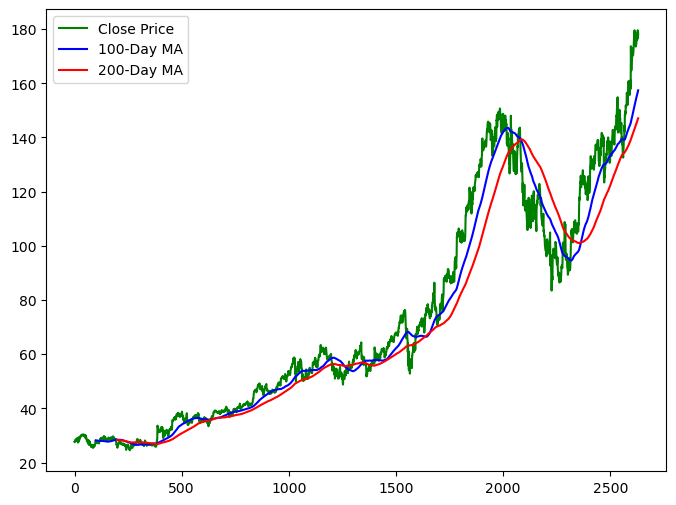

Epoch 1/50


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 0.0589
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0054
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0043
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0043
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0041
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0044
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0034
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0040
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0032
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0033
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0039
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0039
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0030
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0035
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 0.0030
Epoch 16/50
55/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


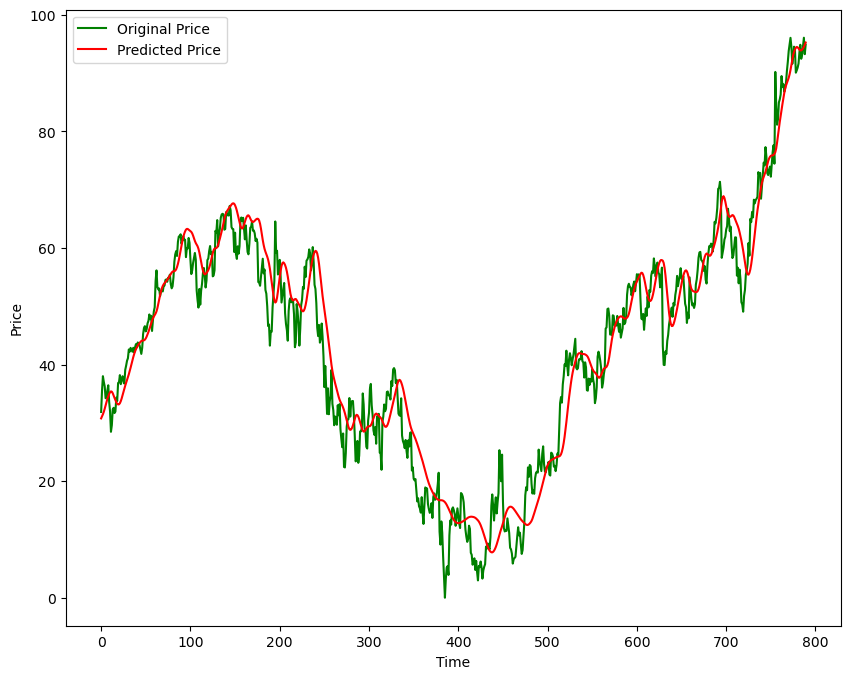

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

start = '2014-01-01'
end = '2024-06-15'
stock = 'GOOG'

data = yf.download(stock, start, end)

data.reset_index(inplace=True)
data.head()

ma_100_days = data['Close'].rolling(100).mean()
ma_200_days = data['Close'].rolling(200).mean()

plt.figure(figsize=(8, 6))
plt.plot(data['Close'], 'g', label='Close Price')
plt.plot(ma_100_days, 'b', label='100-Day MA')
plt.plot(ma_200_days, 'r', label='200-Day MA')
plt.legend()
plt.show()

data.dropna(inplace=True)

data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.70):])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)

x_train = []
y_train = []
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])
    y_train.append(data_train_scale[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)

model.summary()

past_100_days = data_train.tail(100)
data_test = pd.concat([past_100_days, data_test] , ignore_index= True)

data_test_scale = scaler.fit_transform(data_test)

x_test = []
y_test = []
for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])
    y_test.append(data_test_scale[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

y_predict = model.predict(x_test)

scale_factor = 1 / scaler.scale_

y_predict = y_predict * scale_factor

y_test = y_test * scale_factor

plt.figure(figsize=(10, 8))
plt.plot(y_test, 'g', label='Original Price')
plt.plot(y_predict, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

